## Learning about Agents (Langgraph)

In [7]:
from pydantic import BaseModel, Field
from dotenv import load_dotenv 
import os 
from typing import Literal
from langchain_core.tools import tool
# from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
import google.generativeai as genai

In [8]:
load_dotenv() 
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [13]:
class WeatherResponse(BaseModel):
    """Respond to the user with this"""

    temperature: float = Field(description="The temperature in fahrenheit")
    wind_directon: str = Field(
        description="The direction of the wind in abbreviated form"
    )
    wind_speed: float = Field(description="The speed of the wind in km/h")


# This below class ensures that each agent state stores chat history + the final parsed response.
# Inherit 'messages' key from MessagesState, which is a list of chat messages.
class AgentState(MessagesState):
    # Final structured response from the agent
    final_response: WeatherResponse


# @tool
# def get_weather(city: Literal["nyc", "sf"]):
#     """Use this to get weather information."""
#     if city == "nyc":
#         return "It is cloudy in NYC, with 5 mph winds in the North-East direction and a temperature of 70 degrees"
#     elif city == "sf":
#         return "It is 75 degrees and sunny in SF, with 3 mph winds in the South-East direction"
#     else:
#         raise AssertionError("Unknown city")
    
# def get_weather_country(country: Literal["pak", "ind"]):
#     """Use this to get country information."""
#     if country == "pak":
#         return "ahskjhaskdjhaskjdkajsdj"
#     elif country == "ind":
#         return "It is 75 degrees and sunny in ind, with 3 mph winds in the South-East direction"
#     else:
#         raise AssertionError("Unknown city")


# tools = [get_weather, get_weather_country]

model = ChatGoogleGenerativeAI(model="gemini-1.5-flash-8b")

# It binds the tools aka functions with general bot or general LLM
# model_with_tools = model.bind_tools(tools)

# model_with_structured_output = model.with_structured_output(WeatherResponse)

In [9]:
print(model_with_tools)

bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash-8b', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001EA38752740>, default_metadata=()) kwargs={'tools': [{'type': 'function', 'function': {'name': 'get_weather', 'description': 'Use this to get weather information.', 'parameters': {'properties': {'city': {'enum': ['nyc', 'sf'], 'type': 'string'}}, 'required': ['city'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'get_weather_country', 'description': 'Use this to get country information.', 'parameters': {'properties': {'country': {'enum': ['pak', 'ind'], 'type': 'string'}}, 'required': ['country'], 'type': 'object'}}}]} config={} config_factories=[]


In [10]:
response = model_with_tools.invoke("What's the weather like in pak?")
print(response)

content='' additional_kwargs={'function_call': {'name': 'get_weather_country', 'arguments': '{"country": "pak"}'}} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-dfcc9dd7-64d1-4145-8529-f44e9e60fa7c-0' tool_calls=[{'name': 'get_weather_country', 'args': {'country': 'pak'}, 'id': '13ad6cf1-7631-4f93-9d16-ff5375ce621f', 'type': 'tool_call'}] usage_metadata={'input_tokens': 39, 'output_tokens': 7, 'total_tokens': 46, 'input_token_details': {'cache_read': 0}}


In [10]:
response = model_with_structured_output.invoke("What's the weather like in NYC?")
print(response)

temperature=70.0 wind_directon='N' wind_speed=15.0


In [5]:
model_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash-8b', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x0000023C600641C0>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'get_weather', 'description': 'Use this to get weather information.', 'parameters': {'properties': {'city': {'enum': ['nyc', 'sf'], 'type': 'string'}}, 'required': ['city'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [4]:
model_with_structured_output

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash-8b', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x0000023C600641C0>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'WeatherResponse', 'description': 'Respond to the user with this', 'parameters': {'properties': {'temperature': {'description': 'The temperature in fahrenheit', 'type': 'number'}, 'wind_directon': {'description': 'The direction of the wind in abbreviated form', 'type': 'string'}, 'wind_speed': {'description': 'The speed of the wind in km/h', 'type': 'number'}}, 'required': ['temperature', 'wind_directon', 'wind_speed'], 'type': 'object'}}}], 'tool_choice': 'WeatherResponse'}, config={}, config_factories=[])
| PydanticToolsParser(first_tool_only=True, tools=[<class '__main__.WeatherResponse'>])

### Agent Example # 1: Bind output as tool

In [ ]:
# class AgentState(MessagesState):
#     # Final structured response from the agent
#     final_response: WeatherResponse


In [10]:
# Initialize Gemini models
frontend_model = genai.GenerativeModel("gemini-pro")
backend_model = genai.GenerativeModel("gemini-pro")
integration_model = genai.GenerativeModel("gemini-pro")

#### TOOLS

In [14]:
@tool
def frontend():
    """Use this to generate frontend UI/UX designs, React components, or styling ideas."""
    prompt = "Generate a modern and responsive UI/UX design idea for a web dashboard."
    response = frontend_model.generate_content(prompt)
    return response.text

@tool
def backend():
    """Use this to generate backend API logic, database schemas, or optimizations."""
    prompt = "Suggest an optimized database schema for an e-commerce platform handling millions of users."
    response = backend_model.generate_content(prompt)
    return response.text

# @tool
# def integration():
#     """Use this to generate API contracts, backend-frontend communication strategies, and integration techniques."""
#     prompt = """
#     Suggest the best way to integrate a React frontend with a FastAPI backend.
#     Provide API contract examples, state management techniques, and security best practices.
#     """
#     response = integration_model.generate_content(prompt)
#     return response.text

In [ ]:
# tools = [frontend, backend]

# model = ChatGoogleGenerativeAI(model="gemini-1.5-flash-8b")

# # It binds the tools aka functions with general bot or general LLM
# model_with_tools = model.bind_tools(tools)

# model_with_structured_output = model.with_structured_output(WeatherResponse)

In [ ]:
tools = [frontend, backend]

# Force the model to use tools by passing tool_choice="any"
model_with_response_tool = model.bind_tools(tools, tool_choice="any")

# Define the function that calls the model
def call_model(state: AgentState):
    response = model_with_response_tool.invoke(state["messages"])
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

# Define the function that responds to the user
def respond(state: AgentState):
    # Construct the final answer from the arguments of the last tool call
    weather_tool_call = state["messages"][-1].tool_calls[0]
    response = weather_tool_call["args"]
    # Since we're using tool calling to return structured output,
    # we need to add  a tool message corresponding to the WeatherResponse tool call,
    # This is due to LLM providers' requirement that AI messages with tool calls
    # need to be followed by a tool message for each tool call
    tool_message = {
        "type": "tool",
        "content": "Here is your structured response",
        "tool_call_id": weather_tool_call["id"],
    }
    # We return the final answer
    return {"final_response": response, "messages": [tool_message]}


# Define the function that determines whether to continue or not
def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]
    # If there is only one tool call and it is the response tool call we respond to the user
    if (
        len(last_message.tool_calls) == 1
        and last_message.tool_calls[0]["name"] == "WeatherResponse"
    ):
        return "respond"
    # Otherwise we will use the tool node again
    else:
        return "continue"


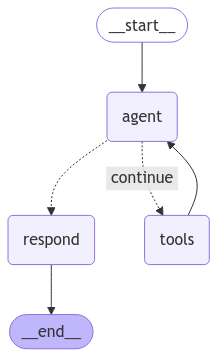

In [ ]:
# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("respond", respond)
workflow.add_node("tools", ToolNode(tools))

# Set the entrypoint as `agent`
# This means that this node is the first one called
workflow.set_entry_point("agent")

# We now add a conditional edge
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",
        "respond": "respond",
    },
)

workflow.add_edge("tools", "agent")
workflow.add_edge("respond", END)

graph = workflow.compile()

graph

In [ ]:
answer = graph.invoke(input={"messages": [("human", "what's the weather in SF?")]})[
    "final_response"
]

In [20]:
from langchain.agents import Tool
from langchain.prompts import MessagesPlaceholder
from langchain.memory import ConversationBufferMemory
from langgraph.graph import StateGraph, END
from langchain.chat_models import ChatVertexAI  # Or your preferred Gemini model import

# Initialize Gemini models
frontend_model = genai.GenerativeModel("gemini-pro")
backend_model = genai.GenerativeModel("gemini-pro")
integration_model = genai.GenerativeModel("gemini-pro")


@tool
def frontend(user_query: str):
    """Use this to generate frontend UI/UX designs, React components, or styling ideas based on the user's query."""
    prompt = f"Generate a modern and responsive UI/UX design idea for a web dashboard based on this request: {user_query}"
    response = frontend_model.generate_content(prompt)
    return response.text

@tool
def backend(user_query: str):
    """Use this to generate backend API logic, database schemas, or optimizations based on the user's query."""
    prompt = f"Suggest an optimized database schema for an e-commerce platform handling millions of users. The user's specific requirement is: {user_query}"
    response = backend_model.generate_content(prompt)
    return response.text

tools = [frontend, backend]

# Define the AgentState
class AgentState:
    messages: list

# Define the functions for the graph
def call_model(state: AgentState):
    # Use the latest message from the user
    user_query = state.messages[-1].content  # Assuming the last message is the user query

    # Choose a tool based on the user query (this could be more sophisticated)
    if "frontend" in user_query.lower() or "ui" in user_query.lower() or "ux" in user_query.lower():
      tool_to_use = frontend
    elif "backend" in user_query.lower() or "database" in user_query.lower() or "api" in user_query.lower():
      tool_to_use = backend
    else: # Default to frontend if no keywords are found
      tool_to_use = frontend

    tool_result = tool_to_use(user_query)


    # Add the tool result as a message
    return {"messages": state.messages + [{"type": "tool", "content": tool_result, "tool_name": tool_to_use.__name__}]}


def respond(state: AgentState):
    tool_result = state.messages[-1].content  #The last message is the tool result
    return {"final_response": tool_result}

def should_continue(state: AgentState):
    # Always respond after a tool call
    return "respond"


# Build the graph
builder = StateGraph(AgentState)
builder.add_node("call_model", call_model)
builder.add_node("respond", respond)
builder.add_edge("call_model", "respond") # Always respond after a tool call

# builder.add_edge("call_model", "call_model", condition=lambda state: should_continue(state) == "continue")
# builder.add_edge("call_model", "respond", condition=lambda state: should_continue(state) == "respond")
builder.set_entry_point("call_model")
graph = builder.build()

# Initialize the agent
agent = graph.create_agent()


def process_user_query(user_query):
    # Initialize the conversation history
    messages = [{"type": "human", "content": user_query}]
    state = AgentState(messages=messages)
    result = agent.run(state)
    return result["final_response"]

# Example usage:
user_query = "I need a design for a user profile page in React."
response = process_user_query(user_query)
print(response)

user_query = "What's a good database schema for product inventory?"
response = process_user_query(user_query)
print(response)

AttributeError: 'StateGraph' object has no attribute 'build'

In [ ]:
def frontend():
    query = "Build me complete frontend of an ecommerce site."
    prompt = f"""
    Your job is to create frontend according to user query below, you have to strictly use html, bootstrap and you can use placeholder images make sure to add styling using inline CSS. Just give final code only. Below are some Bootstrap examples consider them as well.
    Query: {query}

    Bootstrap examples: 
    <body>
    <nav class="navbar navbar-light bg-warning">
      <a class="navbar-brand mr-auto" href="#" style="font-family:Snell Roundhand, cursive">
        <i class="fa fa-leaf text-dark" text-info aria-hidden="true"></i> House living</a>
      <div class="container text-right m-0" style="width: 160px">
          <a href="" class="text-dark"><i class="social-icon fa fa-twitter-square fa-1x"></i></a>
          <a href="" class="text-dark"><i class="social-icon fa fa-google-plus-square fa-1x"></i></a>
          <a href="" class="text-dark"><i class="social-icon fa fa-facebook-square fa-1x"></i></a>
          <a href="" class="text-dark"><i class="social-icon fa fa-instagram fa-1x"></i></a>
        </div>
      <div class="dropdown">
        <button class="btn btn-sm btn-cart" data-toggle="dropdown"><i class="fa fa-shopping-cart text-dark fa-2x" aria-hidden="true" style="cursor: pointer;"></i><span class="badge badge-danger">12</span>
        </button>

        <div class="dropdown-menu dropdown-menu-right" style="min-width: 300px;">
          <div class="px-4 py-3">
              <h6 class="text-center mb-5">Selected item</h6>
              <table class="table table-sm">
                <thead class="text-center">
                  <tr>
                    <th></th>
                    <th>Name</th>
                    <th>Number</th>
                    <th>Total</th>
                  </tr>
                </thead>
                <tbody class="text-center">
                  <tr>
                    <td class="align-middle text-center">
                      <div class="list-card">
                          <a class="text-muted" href="#removeModal" data-toggle="modal" data-target="#removeModal" data-title=""><i class="fa fa-trash" aria-hidden="ture"></i></a>
                        <img src="https://i.pinimg.com/564x/ee/0f/88/ee0f880849e919c7ddbe53e3107b4d4a.jpg" alt="" />
                      </div>
                    </td>
                    <td class="align-middle">Established</td>
                    <td class="align-middle">1</td>
                    <td class="align-middle text-right">$600</td>
                  </tr>
                  <tr>
                    <td class="align-middle text-center">
                      <div class="list-card">
                          <a class="text-muted" href="#" data-toggle="modal" data-target="#removeModal" data-title=""><i class="fa fa-trash" aria-hidden="ture"></i></a>
                        <img src="https://i.pinimg.com/564x/f4/5e/8e/f45e8ee28d8195399897ea6c0c5ab95d.jpg" alt="" />
                      </div>
                    </td>
                    <td class="align-middle">Unchanged</td>
                    <td class="align-middle">2</td>
                    <td class="align-middle text-right">$1600</td>
                  </tr>
                  <tr>
                    <td class="del align-middle text-center">
                      <div class="list-card">
                          <a class="text-muted" href="#" data-toggle="modal" data-target="#removeModal" data-title=""><i class="fa fa-trash" aria-hidden="ture"></i></a>
                        <img src="https://i.pinimg.com/564x/50/c4/e2/50c4e2d0b5eb3d0652e0aa5959cec9f7.jpg" alt="" />
                      </div>
                    </td>
                    <td class="align-middle">McClintock</td>
                    <td class="align-middle">3</td>
                    <td class="align-middle text-right">$2600</td>
                  </tr>
                </tbody>
              </table>
            </div>
        </div>
      </div>
    </nav>
    <div class="container">
      <nav aria-label="breadcrumb" style="font-family:Didot, serif" class="d-flex">
        <ol class="breadcrumb bg-transparent pl-0 mr-auto">
          
          <li class="breadcrumb-item"><a class="text-dark" href="#">Home</a></li>
          <li class="breadcrumb-item"><a class="text-dark"  href="#">Lifestyle</a></li>
          <li class="breadcrumb-item active" aria-current="page"><a class="text-dark" href="">About us</a></li>
          
        </ol>
        <form class="form-inline">
          <a class="btn btn-outline-dark mr-2 btn-sm" data-toggle="modal" data-target="#loginModal"
          href="">Log in</a>
          <a class="btn btn-dark btn-sm" data-toggle="modal" data-target="#createModal" href="">Create</a></form>
      </nav>
      <div class="jumbotron jumbotron-fluid jumbotron-bg d-flex align-items-end">
        <div class="container text-center">
          <div class="bg-lighter p-3">
            <h1 class="text-warning" style="font-family:Georgia, serif">Buy hand cramps</h1>
            <p class="lead font-weight-light text-light" style="font-size: 14px;">This is a modified jumbotron that occupies the entire horizontal space of its parent.</p>
          </div>
        </div>
      </div>
      <div class="container">
        <div class="row">
          <div class="col-md-3">
            <div class="list-group list-group-flush sticky-top" style="top:5px;font-family:Didot, serif">
              <a class="list-group-item list-group-item-action text-secondary  active" href="#pane-1" data-toggle="list">
                <!-- <i class="fa fa-star-o"></i>-->Facilisis</a>
                <a class="list-group-item list-group-item-action text-secondary " href="#pane-2" data-toggle="list">
                <!-- <i class="fa fa-star-o"></i>-->Dapibus </a>
                <a class="list-group-item list-group-item-action text-secondary " href="#pane-3" data-toggle="list">
                <!-- <i class="fa fa-star-o"></i>-->Morbi</a>
                <a class="list-group-item list-group-item-action text-secondary " href="#pane-4" data-toggle="list">Porta </a><a class="list-group-item list-group-item-action disabled" href="#">
                <!-- <i class="fa fa-star-o"></i>-->Vestibulum</a></div>
          </div>
          <div class="col-md-9">
            <div class="tab-content">
              <div class="tab-pane active" id="pane-1">
                <div class="row">
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/ee/0f/88/ee0f880849e919c7ddbe53e3107b4d4a.jpg" alt="Card image cap" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Containing</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/67/54/43/675443007f69e7189fa1165849794c31.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Publishing </h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/f4/5e/8e/f45e8ee28d8195399897ea6c0c5ab95d.jpg" alt="Card image cap" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Majority</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/83/49/c4/8349c42327f5f5646b2b0100b0ee2e4d.jpg" alt="Card image cap" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Generators</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/da/9d/59/da9d59b003f936e1000a1169c650ab7d.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Versions</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/9f/28/28/9f28287807be9c930f43194f4b516211.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Conectetur</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                </div>
              </div>
              <div class="tab-pane" id="pane-2">
                <div class="row">
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/eb/d0/89/ebd089c4f8f08e1c8366d2df8d48218a.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Original </h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/cd/93/8d/cd938d81f9b3fb5ff5a18e6f5ad64fd6.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Available</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/50/c4/e2/50c4e2d0b5eb3d0652e0aa5959cec9f7.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Alteration</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/60/07/c1/6007c15615a556a8ad2ddc4794c88172.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Purpose </h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/c0/99/29/c099296795536ab36ad3655f1fd71205.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Readable</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/47/da/55/47da5510afd1bc227cc37352665cbaed.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Essentially</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                </div>
              </div>
              <div class="tab-pane" id="pane-3">
                <div class="row">
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/15/40/a9/1540a93c9e21e005f74f7d73445494bd.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Original </h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/71/98/c4/7198c4857241a72cdcef084da6fa2179.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Available</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/45/58/87/455887c516e19820d87b2c13bdf9005c.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Alteration</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/9a/ba/69/9aba69c423a07f926699cd1143656132.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Purpose </h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/61/e9/40/61e940416c3e7d93e745f63b965112a1.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Readable</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/d3/13/03/d3130326df06ec6824a821452f5d3a42.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Essentially</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                </div>
              </div>
              <div class="tab-pane" id="pane-4">
                <div class="row">
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/75/01/d0/7501d098a601bd93f5fdb60b231b8d3f.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Original </h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/cd/93/8d/cd938d81f9b3fb5ff5a18e6f5ad64fd6.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Available</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/44/6f/0f/446f0fc2f398f3ac798f3a2c3622c738.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Alteration</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/60/07/c1/6007c15615a556a8ad2ddc4794c88172.jpg" style="height: 250px;" alt="Card image cap" />
                      <div class="card-body">
                        <h5 class="card-title">Purpose </h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/9f/2c/6a/9f2c6a9ce65253d3fbead71791e72c10.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Readable</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                  <div class="col-md-4 mb-4">
                    <div class="card text-center h-80 border-0 box-shadow"><img class="card-img-top" src="https://i.pinimg.com/564x/47/da/55/47da5510afd1bc227cc37352665cbaed.jpg" style="height: 250px;" />
                      <div class="card-body">
                        <h5 class="card-title">Essentially</h5>
                        <p class="card-text">This is a wider card with supporting text below as a natural lead-in to additional content. This content is a little bit longer.</p>
                        <div class="card-footer bg-white px-0">
                          <div class="btn-group btn-group-sm"><a class="btn btn-outline-secondary" href="#">Sin</a><a class="btn btn-outline-secondary" href="#">Twn</a><a class="btn btn-outline-secondary disabled" href="#">Tri</a></div>
                        </div>
                      </div>
                    </div>
                  </div>
                </div>
              </div>
            </div>
          </div>
        </div>
      </div>
    </div>
    <hr />
    <div class="row p-3">
      <div class="col-md-4">
        <div class="sticky-top" style="top: 10px;">
          <h4 class="h2">Minimalist style</h4>
          <div class="d-flex justify-content-end align-items-end mb-auto"><span class="text-muted">Price $1299</span>
            <div class="h3 ml-auto mb-0 text-danger"><small> Discount Price NT$</small><strong>1200</strong></div>
          </div>
          <hr />Type：
          <div class="btn-group btn-group-toggle btn-group-sm" data-toggle="buttons">
            <label class="btn btn-outline-secondary active disabled">
              <input id="option1" type="radio" name="options" autocomplete="off" checked="" /> Simple
            </label>
            <label class="btn btn-outline-secondary">
              <input id="option2" type="radio" name="options" autocomplete="off" /> North
            </label>
            <label class="btn btn-outline-secondary">
              <input id="option3" type="radio" name="options" autocomplete="off" /> Fanlan
            </label>
          </div>
          <div class="input-group mt-3">
            <select class="form-control mr-1" name="" id="">
              <option value="1">single</option>
              <option value="2">tweens</option>
              <option value="3">three</option>
            </select><a class="btn btn-primary" href="#">Add Cart</a>
          </div>
        </div>
      </div>
      <div class="col-md-8 mt-3">
        <div class="card" style="width:100%;"><img class="card-img-top" src="https://i.pinimg.com/564x/ea/2e/ef/ea2eef56f87384f74e5f36bfba72f656.jpg" alt="Card image cap" />
          <img class="mt-2" src="https://i.pinimg.com/564x/1b/93/8f/1b938fb2d0d6c6cb7e36b54d14515391.jpg" alt="">
        </div>
        <div class="card-body text-center">
          <h5 class="card-title ">Tweens</h5>
          <p class="card-text "></p>Some quick example text to build on the card title and make up the bulk of the card's content.
        </div>
      </div>
    </div>
    <hr />
    <div class="container main-contant py-5">
      <h1 class="text-center mb-3 text-secondary">House living pay page</h1>
      <div class="form-row text-center">
        <div class="col-12 col-sm">
          <div class="alert alert-dark alert-rounded" role="alert">1.professor at Hampden-Sydney College in Virginia</div>
        </div>
        <div class="col-12 col-sm">
          <div class="alert alert-info alert-rounded" role="alert">2.There are many variations of passages of Lorem Ipsum available</div>
        </div>
        <div class="col-12 col-sm">
          <div class="alert alert-warning alert-rounded" role="alert">3.accompanied by English versions from the 1914</div>
        </div>
      </div>
      <div class="row justify-content-center mt-5">
        <div class="col-md-8">
          <div class="card w-100 " style="border: none">
            <div class="card-header text-center bg-dark" id="headingOne">
              <button class="btn btn-link text-light" data-toggle="collapse" data-target="#collapseOne" aria-expanded="true" aria-controls="collapseOne" style="text-decoration: none;cursor: pointer;">Pay Cart</button>
            </div>
            <div class="collapse" id="collapseOne" aria-labelledby="headingOne" data-parent="#accordion">
              <div class="card-body" >
                <div class="px-4 py-3">
                  <h6 class="text-center mb-5">Selected item</h6>
                  <table class="table table-sm">
                      <thead class="text-center">
                          <tr>
                            <th></th>
                            <th>Name</th>
                            <th>Number</th>
                            <th class="text-right">Total</th>
                          </tr>
                        </thead>
                    <tbody class="text-center">
                      <tr>
                        <td class="align-middle">
                          <div class="list-card">
                              <a class="text-muted" href="#removeModal" data-toggle="modal" data-target="#removeModal" data-title="Established"><i class="fa fa-trash" aria-hidden="ture"></i></a>
                            <img src="https://i.pinimg.com/564x/ee/0f/88/ee0f880849e919c7ddbe53e3107b4d4a.jpg" alt="" />
                          </div>
                        </td>
                        <td class="align-middle">Established</td>
                        <td class="align-middle">1</td>
                        <td class="align-middle text-right">$600</td>
                      </tr>
                      <tr>
                        <td class="align-middle">
                          <div class="list-card">
                              <a class="text-muted" href="#" data-toggle="modal" data-target="#removeModal" data-title="Unchanged"><i class="fa fa-trash" aria-hidden="ture"></i></a>
                            <img src="https://i.pinimg.com/564x/f4/5e/8e/f45e8ee28d8195399897ea6c0c5ab95d.jpg" alt="" />
                          </div>
                        </td>
                        <td class="align-middle">Unchanged</td>
                        <td class="align-middle">2</td>
                        <td class="align-middle text-right">$1600</td>
                      </tr>
                      <tr>
                        <td class="del align-middle">
                          <div class="list-card">
                              <a class="text-muted" href="#" data-toggle="modal" data-target="#removeModal" data-title="McClintock"><i class="fa fa-trash" aria-hidden="ture"></i></a>
                            <img src="https://i.pinimg.com/564x/50/c4/e2/50c4e2d0b5eb3d0652e0aa5959cec9f7.jpg" alt="" />
                          </div>
                        </td>
                        <td class="align-middle">McClintock</td>
                        <td class="align-middle">3</td>
                        <td class="align-middle text-right">$2600</td>
                      </tr>
                    </tbody>
                    <tfoot class="text-right">
                      <tr>
                        <td></td>
                        <td></td>
                        <td></td>
                        <td class="font-weight-bold">Fee: NT$200</td>
                      </tr>
                      <tr>
                        <td></td>
                        <td></td>
                        <td></td>
                        <td class="font-weight-bold text-danger">Total: NT$4800</td>
                      </tr>
                    </tfoot>
                  </table><a class="btn btn-primary btn-block" href="#" data-toggle="modal" data-target="#editModal" data-title="Checkout list">Check out</a>
                </div>
              </div>
            </div>
          </div>
        </div>
      </div>
      <div class="row justify-content-center mt-5">
          <div class="col-md-8">
              <div class="card w-100">
                  <div class="card-header bg-info text-center font-weight-bold">Orderer information</div>
                    <div class="card-body">
                      <div class="px-4 py-3">
                          <form class="">
                              <div class="form-row">
                                <div class="col-md-6 mb-3">
                                  <label for="validationServer01">First name</label>
                                  <input class="form-control is-valid" id="validationServer01" type="text" placeholder="First name" value="Mark" required="" />
                                  <div class="valid-feedback">Looks good!</div>
                                </div>
                                <div class="col-md-6 mb-3">
                                  <label for="validationServer02">Last name</label>
                                  <input class="form-control is-valid" id="validationServer02" type="text" placeholder="Last name" value="Otto" required="" />
                                  <div class="valid-feedback">Looks good!</div>
                                </div>
                                
                              </div>
                              <div class="form-row">
                                <div class="col-md-4 mb-3">
                                  <label for="validationServer03">Country</label>
                                  <select class="form-control is-invalid" name="" id="" required>
                                      <option value="">Albania</option>
                                      <option value="">Mexico</option>
                                      <option value="">Bahamas</option>
                                      <option value="">Russian Federation</option>
                                      <option value="">Norway</option>
                                      <option value="">Bolivia</option>
                                      <option value="">Peru</option>
                                      <option value="">Colombia</option>
                                      <option value="">Qatar</option>
                                      <option value="">Nigeria</option>
                                    </select>
                                  <div class="invalid-feedback">Please provide a valid country.</div>
                                </div>
                                <div class="col-md-4 mb-3">
                                  <label for="validationServer05">City</label>
                                  <select class="form-control is-invalid" name="" id="" required>
                                      <option value="">New York</option>
                                      <option value="">Los Angeles</option>
                                      <option value="">Charlotte</option>
                                      <option value="">Austin</option>
                                      <option value="">Paris</option>
                                      <option value="">London</option>
                                      <option value="">Zurich</option>
                                      <option value="">Brussels</option>
                                      <option value="">Oslo</option>
                                      <option value="">Madrid</option>
                                    </select>

                                  <div class="invalid-feedback">Please enter your city.</div>
                                </div>
                                <div class="col-md-4 mb-3">
                                    <label for="validationServer05">Postal code</label>
                                    <input class="form-control is-invalid" id="validationServer05" type="number" placeholder="post code" required="" />
                                    <div class="invalid-feedback">Please enter your postal code.</div>
                                  </div>
                              </div>
                              <div class="form-row">
                                <div class="col-md-12 mb-3">
                                  <label for="validationServer05">Email</label>
                                  <input class="form-control is-invalid" id="validationServer05" type="email" placeholder="email" required="" />
                                  <div class="invalid-feedback">Please enter your email.</div>
                                </div>
                              </div>
                              <div class="form-row">
                                  <div class="col-md-12 mb-3">
                                    <label for="validationServer01">address</label>
                                    <input class="form-control is-invalid" id="validationServer01" type="text" placeholder="Address" value="No.12, Sec. 4, Ren’ai Rd., Xinyi Dist., Taipei City 110, Taiwan (R.O.C.)" required="" />
                                    <div class="valid-feedback">Looks good!</div>
                                  </div>
                              </div>
                              <div class="form-group pl-4">
                                <div class="form-check">
                                  <input class="form-check-input is-invalid" id="invalidCheck3" type="checkbox" value="" required="" />
                                  <label class="form-check-label" for="invalidCheck3">Agree to terms and conditions</label>
                                  <div class="invalid-feedback">You must agree before submitting.</div>
                                </div>
                              </div>
                              <button class="btn btn-primary" type="submit" data-toggle="modal" data-target="#sendModal" data-title="Double Confirm">Send</button>
                              <button class="btn btn-secondary" type="submit" data-toggle="modal" data-target="#sendModal" data-title="Double Confirm">
                                  Continue to buy</button>
                            </form>
                      </div>
                    </div>
                  
                  
                </div>
          </div>
      </div>

      <div class="row justify-content-center mt-5">
        <div class="col-md-8">
          <div class="card w-100">
            <div class="card-header bg-warning text-center font-weight-bold">
                Checkout completed</div>
              <div class="card-body">
                <table class="table table-sm p-5 text-center">
                  <thead>
                    <div class="h5 m-4 text-center">Purchase information</div>
                  </thead>
                  <tbody>
                    <tr>
                      <td>Name</td>
                      <td>Number</td>
                      <td>Subtotal</td>
                    </tr>
                    <tr>
                      <td class="h5">
                        <div class="pay-fin-img my-3">
                            <img class="card-img-top" src="https://i.pinimg.com/564x/15/40/a9/1540a93c9e21e005f74f7d73445494bd.jpg" style="height: 80px;width: 80px" alt="Card image cap" />
                        </div>
                        
                        Essentially
                      </td>
                      <td class="align-middle">1</td>
                      <td class="align-middle">NT$2400</td>
                    </tr>
                    <tr>
                      <td></td>
                      <td></td>
                      <td class="text-right font-weight-bold">Fee: NT$200</td>
                    </tr>
                    <tr>
                      <td></td>
                      <td></td>
                      <td class="text-right text-danger font-weight-bold">Total: NT$2600</td>
                    </tr>
                  </tbody>
                  <tfoot></tfoot>
                  
              <table class="table table-sm text-center">
                  <tbody>
                      <div class="h5 text-center p-4">personal information
                        </div>
                    <tr>
                      <td class="font-weight-bold">Email</td>
                      <td colspan="8">white256***@gmail.com</td>
                    </tr>
                    <tr>
                        <td class="font-weight-bold">Name</td>
                        <td colspan="8">hand hand</td>
                      </tr>
                    <tr>
                      <td class="font-weight-bold">Phone</td>
                      <td colspan="8">0976534***</td>
                    </tr>
                    <tr>
                        <td class="font-weight-bold">Address</td>
                        <td colspan="8">***********</td>
                      </tr>
                  </tbody>
                  <tfoot></tfoot>
              </table>
                
                </table>
              </div>
          </div>
        </div>
      </div>      
    </div>
    
    <!--edit&remove Modal-->
    <div class="modal fade" id="removeModal" tabindex="-1" role="dialog" aria-labelledby="exampleModalLabel" aria-hidden="true">
      <div class="modal-dialog" role="document">
        <div class="modal-content">
          <div class="modal-header text-white bg-danger">
            <h5 class="modal-title" id="exampleModalLabel">Modal title</h5>
            <button class="close" type="button" data-dismiss="modal" aria-label="Close"><span aria-hidden="true">×</span></button>
          </div>
          <div class="modal-body">
            <div class="card-body">
              <div class="px-4 py-3">
                <h6 class="text-center mb-5">Selected item</h6>
                <table class="table table-sm">
                  <thead class="text-center">
                    <tr>
                      <th></th>
                      <th>Name</th>
                      <th>Number</th>
                      <th class="text-right">Total</th>
                    </tr>
                  </thead>
                  <tbody class="text-center">
                    <tr>
                      <td class="align-middle">
                        <div class="list-card">
                            <a class="text-muted" href="#removeModal" data-toggle="modal" data-target="#removeModal" data-title=""><i class="fa fa-trash" aria-hidden="ture"></i></a>
                          <img src="https://i.pinimg.com/564x/ee/0f/88/ee0f880849e919c7ddbe53e3107b4d4a.jpg" alt="" />
                        </div>
                      </td>
                      <td class="align-middle">Established</td>
                      <td class="align-middle">1</td>
                      <td class="align-middle text-right">$600</td>
                    </tr>
                    <tr>
                      <td class="align-middle">
                        <div class="list-card">
                            <a class="text-muted" href="#" data-toggle="modal" data-target="#removeModal" data-title=""><i class="fa fa-trash" aria-hidden="ture"></i></a>
                          <img src="https://i.pinimg.com/564x/f4/5e/8e/f45e8ee28d8195399897ea6c0c5ab95d.jpg" alt="" />
                        </div>
                      </td>
                      <td class="align-middle">Unchanged</td>
                      <td class="align-middle">2</td>
                      <td class="align-middle text-right">$1600</td>
                    </tr>
                    <tr>
                      <td class="del align-middle">
                        <div class="list-card">
                            <a class="text-muted" href="#" data-toggle="modal" data-target="#removeModal" data-title=""><i class="fa fa-trash" aria-hidden="ture"></i></a>
                          <img src="https://i.pinimg.com/564x/50/c4/e2/50c4e2d0b5eb3d0652e0aa5959cec9f7.jpg" alt="" />
                        </div>
                      </td>
                      <td class="align-middle">McClintock</td>
                      <td class="align-middle">3</td>
                      <td class="align-middle text-right">$2600</td>
                    </tr>
                  </tbody>
                </table>
              </div>
            </div>
          </div>
          <div class="modal-footer">
            <button class="btn btn-outline-dark" type="button" data-dismiss="modal">Close</button>
            <button class="btn btn-outline-danger" type="button">Save changes</button>
          </div>
        </div>
      </div>
    </div>
    <div class="modal fade" id="editModal" tabindex="-1" role="dialog" aria-labelledby="exampleModalLabel" aria-hidden="true">
      <div class="modal-dialog" role="document">
        <div class="modal-content">
          <div class="modal-header text-white bg-warning">
            <h5 class="modal-title" id="exampleModalLabel">Modal title</h5>
            <button class="close" type="button" data-dismiss="modal" aria-label="Close"><span aria-hidden="true">×</span></button>
          </div>
          <div class="modal-body">
            <div class="card-body">
              <div class="px-4 py-3">
                <h6 class="text-center mb-5">Selected item</h6>
                <table class="table table-sm">
                  <thead class="text-center">
                    <tr>
                      <th></th>
                      <th>Name</th>
                      <th>Number</th>
                      <th class="text-right">Total</th>
                    </tr>
                  </thead>
                  <tbody class="text-center">
                    <tr>
                      <td class="align-middle">
                        <div class="list-card"><img src="https://i.pinimg.com/564x/ee/0f/88/ee0f880849e919c7ddbe53e3107b4d4a.jpg" alt="" /></div>
                      </td>
                      <td class="align-middle">Established</td>
                      <td class="align-middle">1</td>
                      <td class="align-middle text-right">$600</td>
                    </tr>
                    <tr>
                      <td class="align-middle">
                        <div class="list-card"><img src="https://i.pinimg.com/564x/f4/5e/8e/f45e8ee28d8195399897ea6c0c5ab95d.jpg" alt="" /></div>
                      </td>
                      <td class="align-middle">Unchanged</td>
                      <td class="align-middle">2</td>
                      <td class="align-middle text-right">$1600</td>
                    </tr>
                    <tr>
                      <td class="del align-middle">
                        <div class="list-card"><img src="https://i.pinimg.com/564x/50/c4/e2/50c4e2d0b5eb3d0652e0aa5959cec9f7.jpg" alt="" /></div>
                      </td>
                      <td class="align-middle">McClintock</td>
                      <td class="align-middle">3</td>
                      <td class="align-middle text-right">$2600</td>
                    </tr>
                  </tbody>
                </table>
              </div>
            </div>
          </div>
          <div class="modal-footer">
            <button class="btn btn-outline-dark" type="button" data-dismiss="modal">Close</button>
            <button class="btn btn-outline-danger" type="button">Save changes</button>
          </div>
        </div>
      </div>
    </div>
    <div class="modal fade" id="sendModal" tabindex="-1" role="dialog" aria-labelledby="exampleModalLabel" aria-hidden="true">
      <div class="modal-dialog" role="document">
        <div class="modal-content">
          <div class="modal-header bg-light">
            <h5 class="modal-title" id="exampleModalLabel">Modal title</h5>
            <button class="close" type="button" data-dismiss="modal" aria-label="Close"><span aria-hidden="true">×</span></button>
          </div>
          <div class="modal-body">
            <form class="p-5">
              <div class="form-row">
                <div class="col-md-6 mb-3">
                  <label for="validationServer01">First name</label>
                  <input class="form-control is-valid" id="validationServer01" type="text" placeholder="First name" value="Mark" required="" />
                  <div class="valid-feedback"></div>
                </div>
                <div class="col-md-6 mb-3">
                  <label for="validationServer02">Last name</label>
                  <input class="form-control is-valid" id="validationServer02" type="text" placeholder="Last name" value="Otto" required="" />
                  <div class="valid-feedback"></div>
                </div>
                <div class="col-md-4 mb-3"></div>
              </div>
              <div class="form-row">
                <div class="col-md-6 mb-3">
                  <label for="validationServer03">City</label>
                  <input class="form-control is-invalid" id="validationServer03" type="text" placeholder="City" required="" />
                  <div class="invalid-feedback"></div>
                </div>
                <div class="col-md-6 mb-3">
                  <label for="validationServer05">Email</label>
                  <input class="form-control is-invalid" id="validationServer05" type="email" placeholder="email" required="" />
                  <div class="invalid-feedback"></div>
                </div>
              </div>
              <div class="form-row">
                  <div class="col-md-12 mb-3">
                    <label for="validationServer01">address</label>
                    <input class="form-control is-invalid" id="validationServer01" type="text" placeholder="First name" value="Mark" required="" />
                    <div class="valid-feedback">Looks good!</div>
                  </div>
              </div>
              <div class="form-group text-center">
                <div class="form-check">
                  <input class="form-check-input is-invalid mt-2" id="invalidCheck3" type="checkbox" value="" required="" />
                  <label class="form-check-label" for="invalidCheck3">Confirm that no problem is sent</label>
                  <button class="btn btn-outline-danger ml-3">Send</button>
                </div>
              </div>
            </form>
          </div>
        </div>
      </div>
    </div>
  <div class="container-fluid bg-dark">
    <div class="row">
      <div class="col-md-12">
        <div class=" text-center text-white py-4">Shanxi Central St., Beitun Dist., Taichung City 406, Taiwan (R.O.C.)</div>
      </div>
    </div>

  </div>

  <!-- accountModal -->
  <div class="modal fade" id="createModal" tabindex="-1" role="dialog" aria-labelledby="exampleModalLabel" aria-hidden="true">
    <div class="modal-dialog" role="document">
      <div class="modal-content">
        <div class="modal-header bg-warning">
          <h5 class="modal-title" id="exampleModalLabel">Create</h5>
          <button type="button" class="close" data-dismiss="modal" aria-label="Close">
            <span aria-hidden="true">&times;</span>
          </button>
        </div>
        <div class="modal-body">
          <div class="text-center mb-5">
            <h3>Create new account</h3>
            <p>"At vero eos et accusamus et iusto odio dignissimos ducimus qui blanditiis praesentium voluptatum
              deleniti atque corrupti quos dolores et quas molestias excepturi sint occaecati cupiditate non provident,
              similique sunt in culpa qui officia deserunt mollitia animi, id est laborum et dolorum fuga.</p>
          </div>
          <form>
            <div class="form-group">
              <label for="exampleInputEmail1">Email address</label>
              <input type="email" class="form-control" id="exampleInputEmail1" aria-describedby="emailHelp" placeholder="Enter email">
              <small id="emailHelp" class="form-text text-muted">We'll never share your email with anyone else.</small>
            </div>
            <div class="form-group">
              <label for="exampleInputPassword1">Password</label>
              <input type="password" class="form-control" id="exampleInputPassword1" placeholder="Password" required>
            </div>
            <div class="form-group">
              <label for="exampleInputPassword1">Check Password</label>
              <input type="password" class="form-control" id="exampleInputPassword1" placeholder="Password" required>
            </div>
            <div class="form-check">
              <input type="checkbox" class="form-check-input" id="exampleCheck1" required>
              <label class="form-check-label" for="exampleCheck1">Check me out</label>
            </div>
            <button type="submit" class="btn btn-primary">Send</button>
          </form>
        </div>
        <div class="modal-footer footerLink">
          <a href="#" data-dismiss="modal" class="mr-auto" data-toggle="modal" data-target="#loginModal">Switch to Log
            in</a>
          <button type="button" class="btn btn-secondary" data-dismiss="modal">Close</button>
          <button type="button" class="btn btn-primary">Save changes</button>
        </div>
      </div>
    </div>
  </div>

  <!-- loginModal -->
  <div class="modal fade" id="loginModal" tabindex="-1" role="dialog" aria-labelledby="exampleModalLabel" aria-hidden="true">
    <div class="modal-dialog" role="document">
      <div class="modal-content">
        <div class="modal-header bg-light">
          <h5 class="modal-title" id="exampleModalLabel">Log in</h5>
          <button type="button" class="close" data-dismiss="modal" aria-label="Close">
            <span aria-hidden="true">&times;</span>
          </button>
        </div>
        <div class="modal-body">
          <form>
            <div class="form-group">
              <label for="exampleInputEmail1">Email address</label>
              <input type="email" class="form-control" id="exampleInputEmail1" aria-describedby="emailHelp" placeholder="Enter email"
                required>
              <small id="emailHelp" class="form-text text-muted">We'll never share your email with anyone else.</small>
            </div>
            <div class="form-group">
              <label for="exampleInputPassword1">Password</label>
              <input type="password" class="form-control" id="exampleInputPassword1" placeholder="Password" required>
            </div>
            <div class="form-check">
              <input type="checkbox" class="form-check-input" id="exampleCheck1">
              <label class="form-check-label" for="exampleCheck1">Check me out</label>
            </div>
            <button type="submit" class="btn btn-primary">Log in</button>
          </form>
        </div>
        <div class="modal-footer footerLink">
          <a href="#" data-dismiss="modal" class="mr-auto" data-toggle="modal" data-target="#createModal">Switch to
            registration</a>
          <button type="button" class="btn btn-secondary" data-dismiss="modal">Close</button>
          <button type="button" class="btn btn-primary">Save changes</button>
        </div>
      </div>
    </div>
  </div>
 

 <script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo"
 crossorigin="anonymous"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.3/umd/popper.min.js" integrity="sha384-ZMP7rVo3mIykV+2+9J3UJ46jBk0WLaUAdn689aCwoqbBJiSnjAK/l8WvCWPIPm49"
 crossorigin="anonymous"></script>
<script src="https://stackpath.bootstrapcdn.com/bootstrap/4.1.1/js/bootstrap.min.js" integrity="sha384-smHYKdLADwkXOn1EmN1qk/HfnUcbVRZyYmZ4qpPea6sjB/pTJ0euyQp0Mk8ck+5T"
 crossorigin="anonymous"></script>
 <script>
    $('#editModal').on('show.bs.modal',function(evt){
    let btn = $(evt.relatedTarget)
    let title = btn.data('title')
    let modal = $(this)
    modal.find('.modal-title').text(title)
  })
  
  $('#removeModal').on('show.bs.modal',function(evt){
    let btn = $(evt.relatedTarget)
    let title = btn.data('title')
    let modal = $(this)
    modal.find('.modal-title').text('Confirm Deletion'+' :   '+title)
  })
  
  $('#sendModal').on('show.bs.modal',function(evt){
    let btn = $(evt.relatedTarget)
    let title = btn.data('title')
    let modal = $(this)
    modal.find('.modal-title').text('Double Confirm'+' :   '+title)
  })
  </script>
</body>



CSS File: .breadcrumb a {
  text-decoration: none;
  cursor: pointer}
.btn-cart {
  background-color: transparent;
  position: relative}
.btn-cart .badge {
    position: absolute;
    top: -5px;
    right: 1px}
.dropdown-menu-right {
  right: 0;
  left: auto}
.jumbotron-bg {
  background-image: url(https://i.pinimg.com/564x/88/b1/bb/88b1bba478508118ccad5581bd6b4486.jpg);
  background-size: cover;
  background-position: center center;
  min-height: 400px }
.bg-lighter{
  background-color: rgba(0,0,0,.35)}

.box-shadow {
  transition: 0.5s}
.box-shadow:hover {
  box-shadow: 3px 5px 10px rgba(0,0,0,.5)
  }
  
.btn.disabled{
  pointer-events: none}
.alert-rounded{
  border-radius: 30px}
p {
  letter-spacing: 1.5px;
  font-size: 12px}
.list-card img{
    width: 60px;
    height: 60px }
.list-card {
  width: 80px;
}
.list-group-item.active {
  background-color:#f9d016;
  border: none;
}

/* .fnicon:hover {
  transform: scale(2);
  transition: 0.5s;
  
} */
.social-icon {
  color: white;
  transition: 0.5s;
}
.social-icon:hover {
  transform: scale(2);
  color: #000;
}
    """
    response = frontend_model.generate_content(prompt)
    return response.text

def backend(fe):
    prompt = f"""
    Your job is to create backend according to the frontend below, you have to strictly use flask and sqlite as db if needed. Just give final code only.
    Frontend: {fe}
    """
    response = backend_model.generate_content(prompt)
    return response.text

def integration(fe, be):
    prompt = f"""
    Your job is to verify if Frontend and Backend codes below are integratable if not you have to make them integratable so that user can just run the output code you provide in respective files and it work. Just give the updated final code only.
    Frontend Code: {fe}
    Backend Code: {be}
    """
    response = integration_model.generate_content(prompt)
    return response.text

SyntaxError: f-string: invalid syntax. Perhaps you forgot a comma? (2805416549.py, line 972)

In [ ]:
frontend_response = frontend()
backend_response = backend(frontend_response)
integration_response = integration(frontend_response, backend_response)

In [26]:
integration_response

'**Frontend Code:**\n\n```javascript\nimport React from "react";\nimport { useState, useEffect } from "react";\nimport ProductCard from "./ProductCard";\nimport "./styles.css";\n\nconst ECommerce = () => {\n  const [products, setProducts] = useState([]);\n\n  useEffect(() => {\n    fetch("http://localhost:5000/products")\n      .then((res) => res.json())\n      .then((data) => setProducts(data))\n      .catch((err) => {\n        console.log(err);\n      });\n  }, []);\n\n  return (\n    <div className="container">\n      <h1 className="title">E-Commerce</h1>\n      <div className="products">\n        {products.map((product) => (\n          <ProductCard\n            key={product.id}\n            image={product.images[0]}\n            name={product.name}\n            price={product.price}\n          />\n        ))}\n      </div>\n    </div>\n  );\n};\n\nexport default ECommerce;\n```\n\n**Backend Code:**\n\n```python\nfrom flask import Flask, request, jsonify\nfrom flask_sqlalchemy impor

In [ ]:
import React, { useState, useEffect } from "react";
import ProductCard from "./ProductCard";
import "./styles.css";

const ECommerce = () => {
  const [products, setProducts] = useState([]);

  useEffect(() => {
    fetch("http://localhost:5000/products")
      .then((res) => res.json())
      .then((data) => setProducts(data))
      .catch((err) => {
        console.error(err); // Changed to console.error for better error handling
      });
  }, []);

  return (
    <div className="container">
      <h1 className="title">E-Commerce</h1>
      <div className="products">
        {products.map((product) => (
          <ProductCard
            key={product.id}
            image={product.images[0]}
            name={product.name}
            price={product.price}
          />
        ))}
      </div>
    </div>
  );
};

export default ECommerce;

In [ ]:
from flask import Flask, request, jsonify
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///site.db'
db = SQLAlchemy(app)

class Product(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    name = db.Column(db.String(100), nullable=False)
    price = db.Column(db.Float, nullable=False)
    images = db.Column(db.String(200), nullable=True)

    def serialize(self):  # Added serialize method for cleaner JSON responses
        return {
            'id': self.id,
            'name': self.name,
            'price': self.price,
            'images': self.images
        }

@app.route('/products', methods=['GET'])
def get_products():
    products = Product.query.all()
    return jsonify([product.serialize() for product in products])

@app.route('/products', methods=['POST'])
def create_product():
    data = request.get_json()
    product = Product(name=data['name'], price=data['price'], images=data['images'])
    db.session.add(product)
    db.session.commit()
    return jsonify(product.serialize()), 201  # Added 201 status code for successful creation

@app.route('/products/<int:id>', methods=['GET'])
def get_product(id):
    product = Product.query.get_or_404(id) # Handle case where product doesn't exist
    return jsonify(product.serialize())

@app.route('/products/<int:id>', methods=['PUT'])
def update_product(id):
    data = request.get_json()
    product = Product.query.get_or_404(id) # Handle case where product doesn't exist
    product.name = data['name']
    product.price = data['price']
    product.images = data['images']
    db.session.commit()
    return jsonify(product.serialize())

@app.route('/products/<int:id>', methods=['DELETE'])
def delete_product(id):
    product = Product.query.get_or_404(id) # Handle case where product doesn't exist
    db.session.delete(product)
    db.session.commit()
    return jsonify({'message': 'Product deleted'}), 204 # 204 No Content is standard for delete

if __name__ == '__main__':
    db.create_all() # creates the database if it does not exist
    app.run(debug=True)